In [54]:
from skimage.util import random_noise
import numpy as np
import matplotlib.pyplot as plt
import cv2

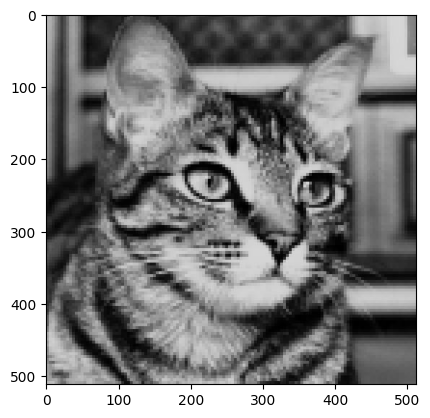

In [55]:
img = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))

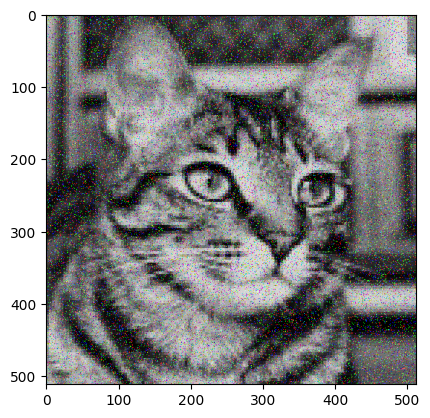

In [ ]:
# Take grayscale image of size 512x512, add some salt & pepper noise and perform the following  operations –

noisy_image = random_noise(img, mode='s&p', amount=0.1, salt_vs_pepper=0.5) 
plt.imshow(noisy_image)

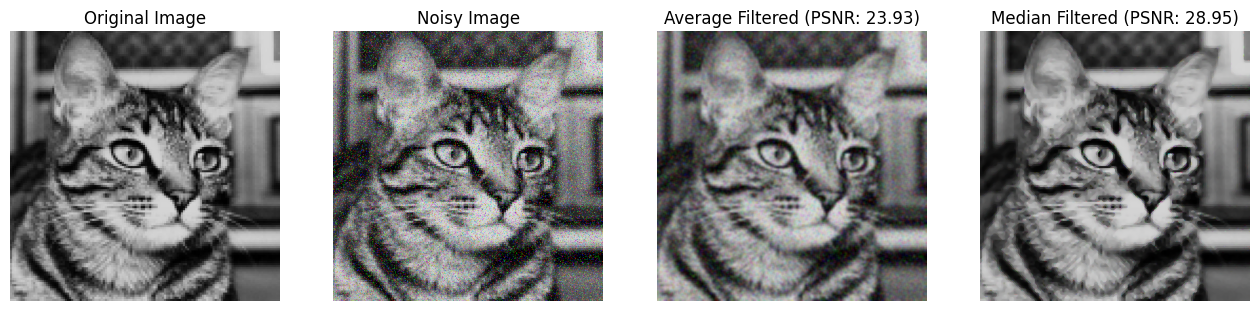

In [57]:
# ) Apply average and median spatial filters with 5x5 mask and observe their performance for  noise suppression in term of PSNR 

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr



noisy_image = random_noise(img, mode='s&p', amount=0.1, salt_vs_pepper=0.5)

noisy_image = (noisy_image * 255).astype(np.uint8)

average_filtered_image = cv2.blur(noisy_image, (5, 5))


median_filtered_image = cv2.medianBlur(noisy_image, 5)


psnr_average = psnr(img, average_filtered_image)
psnr_median = psnr(img, median_filtered_image)


fig, axs = plt.subplots(1, 4, figsize=(16, 8))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title('Noisy Image')
axs[1].axis('off')

axs[2].imshow(average_filtered_image, cmap='gray')
axs[2].set_title(f'Average Filtered (PSNR: {psnr_average:.2f})')
axs[2].axis('off')

axs[3].imshow(median_filtered_image, cmap='gray')
axs[3].set_title(f'Median Filtered (PSNR: {psnr_median:.2f})')
axs[3].axis('off')

plt.show()


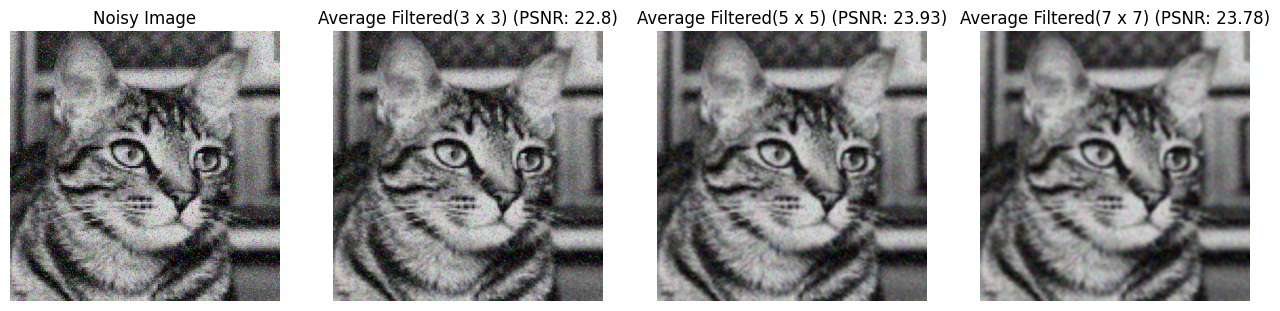

In [58]:
#  Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR  

average_filtered_image3 = cv2.blur(noisy_image, (3, 3))
average_filtered_image5 = cv2.blur(noisy_image, (5, 5))
average_filtered_image7 = cv2.blur(noisy_image, (7, 7))


psnr_average3 = psnr(img, average_filtered_image3)
psnr_average5 = psnr(img, average_filtered_image5)
psnr_average7 = psnr(img, average_filtered_image7)


fig, axs = plt.subplots(1, 4, figsize=(16, 8))

axs[0].imshow(noisy_image, cmap='gray')
axs[0].set_title('Noisy Image')
axs[0].axis('off')

axs[1].imshow(average_filtered_image3, cmap='gray')
axs[1].set_title(f'Average Filtered(3 x 3) (PSNR: {psnr_average3:.1f})')
axs[1].axis('off')

axs[2].imshow(average_filtered_image5, cmap='gray')
axs[2].set_title(f'Average Filtered(5 x 5) (PSNR: {psnr_average5:.2f})')
axs[2].axis('off')

axs[3].imshow(average_filtered_image7, cmap='gray')
axs[3].set_title(f'Average Filtered(7 x 7) (PSNR: {psnr_average7:.2f})')
axs[3].axis('off')

plt.show()

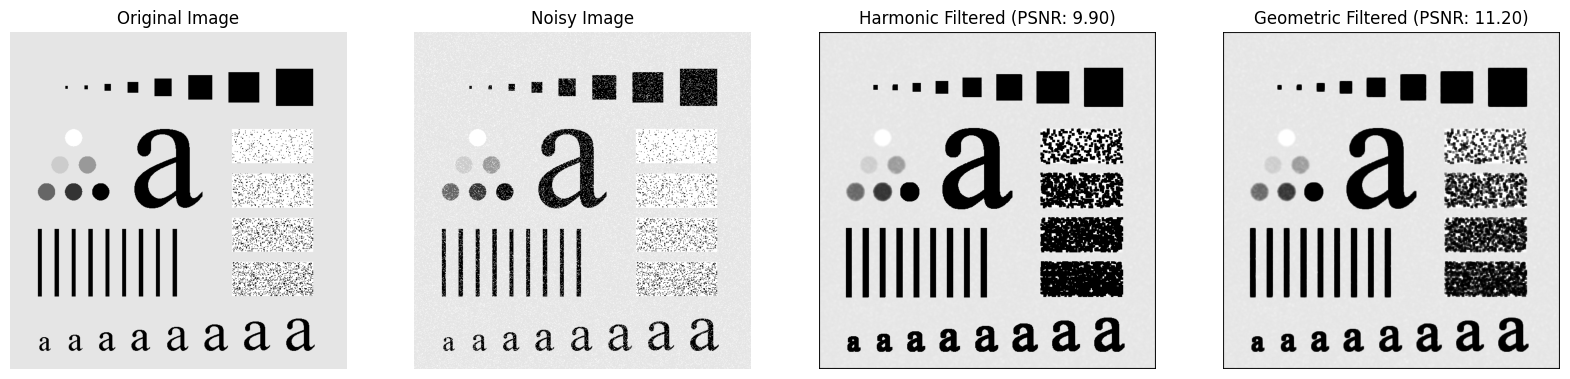

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

def harmonic_mean_filter(img, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32)
    padded_img = np.pad(img, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant', constant_values=0)
    output_img = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            harmonic_mean = kernel_size**2 / np.sum(1.0 / (region + 1e-5))  
            output_img[i, j] = harmonic_mean
    
    return output_img.astype(np.uint8)

def geometric_mean_filter(img, kernel_size=5):
    kernel = np.ones((kernel_size, kernel_size), np.float32)
    padded_img = np.pad(img, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant', constant_values=0)
    output_img = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kernel_size, j:j+kernel_size]
            geo_mean = np.exp(np.sum(np.log(region + 1e-5)) / (kernel_size**2)) 
            output_img[i, j] = geo_mean
    
    return output_img.astype(np.uint8)


img = cv2.imread('pic.tif')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

noisy_image = random_noise(img_gray, mode='s&p', amount=0.1, salt_vs_pepper=1)
noisy_image = (noisy_image * 255).astype(np.uint8)

harmonic_filtered_image = harmonic_mean_filter(noisy_image, 5)
geometric_filtered_image = geometric_mean_filter(noisy_image, 5)


psnr_harmonic = psnr(img_gray, harmonic_filtered_image)
psnr_geometric = psnr(img_gray, geometric_filtered_image)


fig, axs = plt.subplots(1, 4, figsize=(20, 8))
axs[0].imshow(img_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(noisy_image, cmap='gray')
axs[1].set_title('Noisy Image')
axs[1].axis('off')

axs[2].imshow(harmonic_filtered_image, cmap='gray')
axs[2].set_title(f'Harmonic Filtered (PSNR: {psnr_harmonic:.2f})')
axs[2].axis('off')

axs[3].imshow(geometric_filtered_image, cmap='gray')
axs[3].set_title(f'Geometric Filtered (PSNR: {psnr_geometric:.2f})')
axs[3].axis('off')

plt.show()
